# Introduction

The notebook is intended to show Seaborn plot examples.

In [1]:
# Import Standard Libraries
import pandas as pd
from itertools import product as cartesian_product

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

import seaborn as sns

In [2]:
# Read data
data = sns.load_dataset('titanic')
time_data = sns.load_dataset('taxis')
books_sold_train = pd.read_csv('./../data/books_sold_train.csv', parse_dates=['date'], index_col=0)
books_sold_test = pd.read_csv('./../data/books_sold_test.csv', parse_dates=['date'], index_col=0)

In [3]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
time_data.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
time_data['pickup_borough'].nunique()

4

# Theme

In [6]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

# Plots

## Counterplot

It is used for discrete variables.

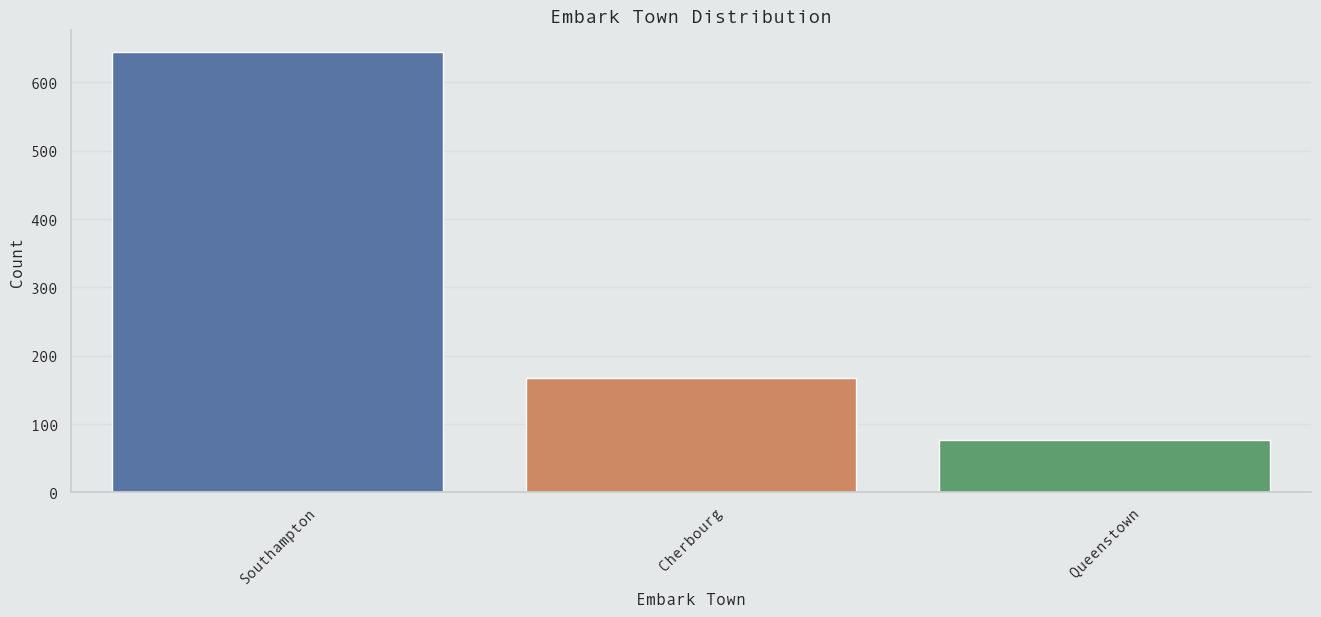

In [7]:
# Plot 'counterplot' of 'embark_town'
ax = sns.countplot(data=data, 
                   x='embark_town', 
                   order=data['embark_town'].value_counts().index)

ax.set_ylabel('Count', 
              fontweight='bold')

ax.set_xlabel('Embark Town', 
              fontweight='bold')

ax.set_title('Embark Town Distribution', 
             fontsize=14)

plt.xticks(rotation=45)

plt.show()

## Barplot

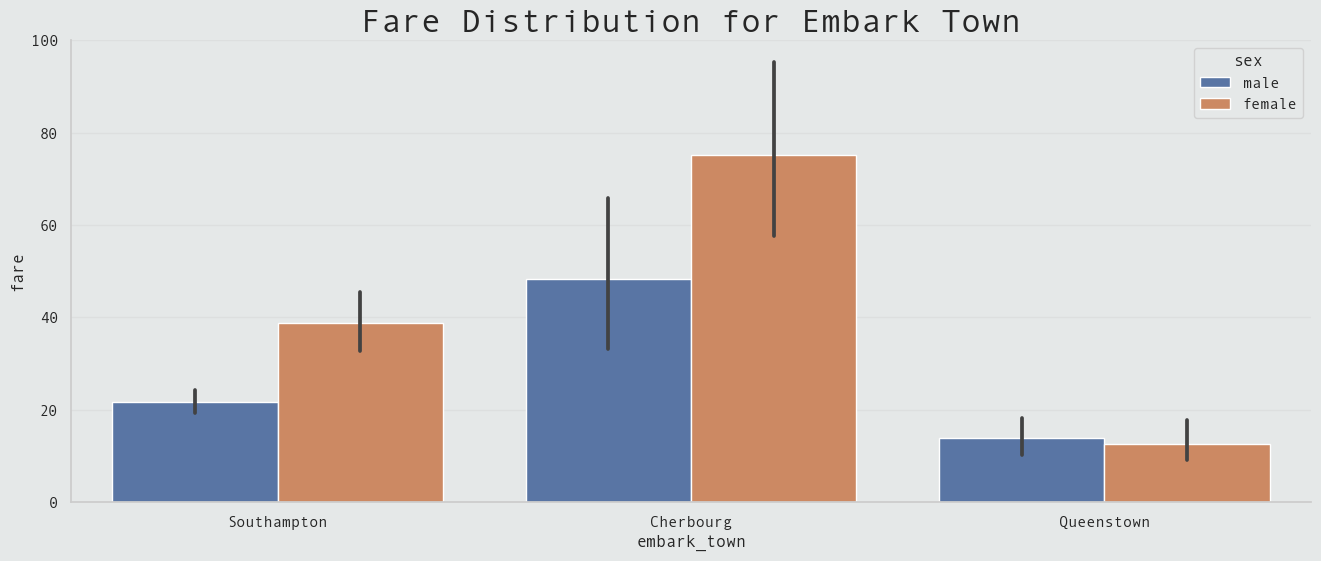

In [8]:
# Plot 'barplot' of 'fare' for 'embark_town'
ax = sns.barplot(data=data, 
                 x='embark_town', 
                 y='fare', 
                 hue='sex')
ax.set_title('Fare Distribution for Embark Town')
plt.show()

## Histogram

Is is used for continuos variables.

## Single

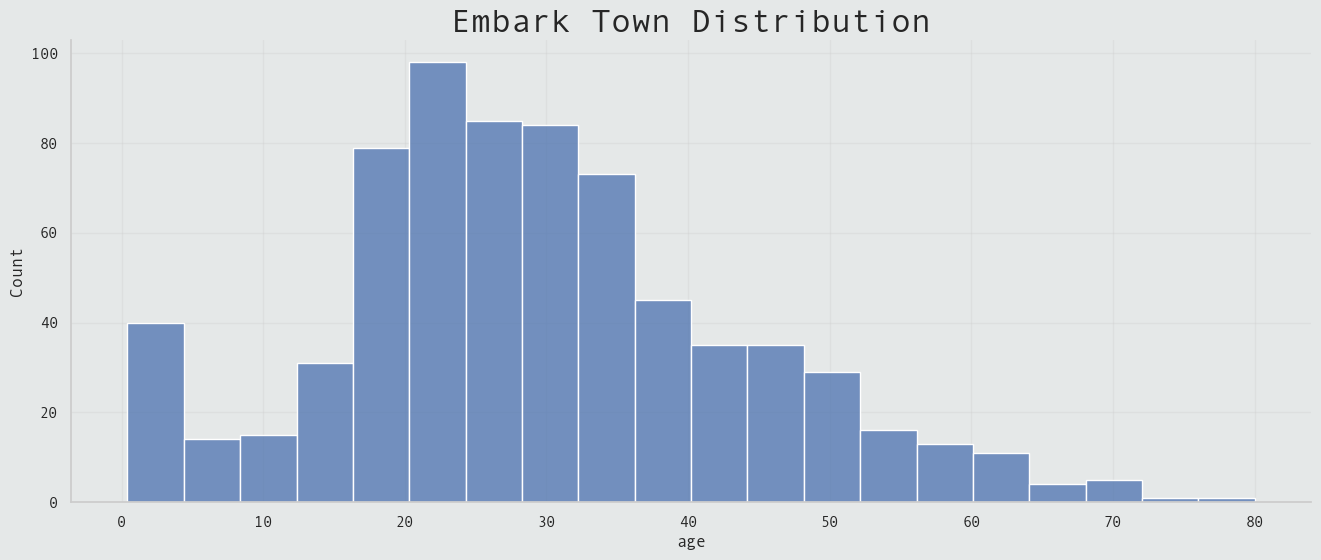

In [9]:
ax = sns.histplot(data=data, 
                  x='age')
ax.set_title('Embark Town Distribution')
plt.show()

## Multiple

In [10]:
data.embark_town.nunique()

3

In [11]:
data['class'].nunique()

3

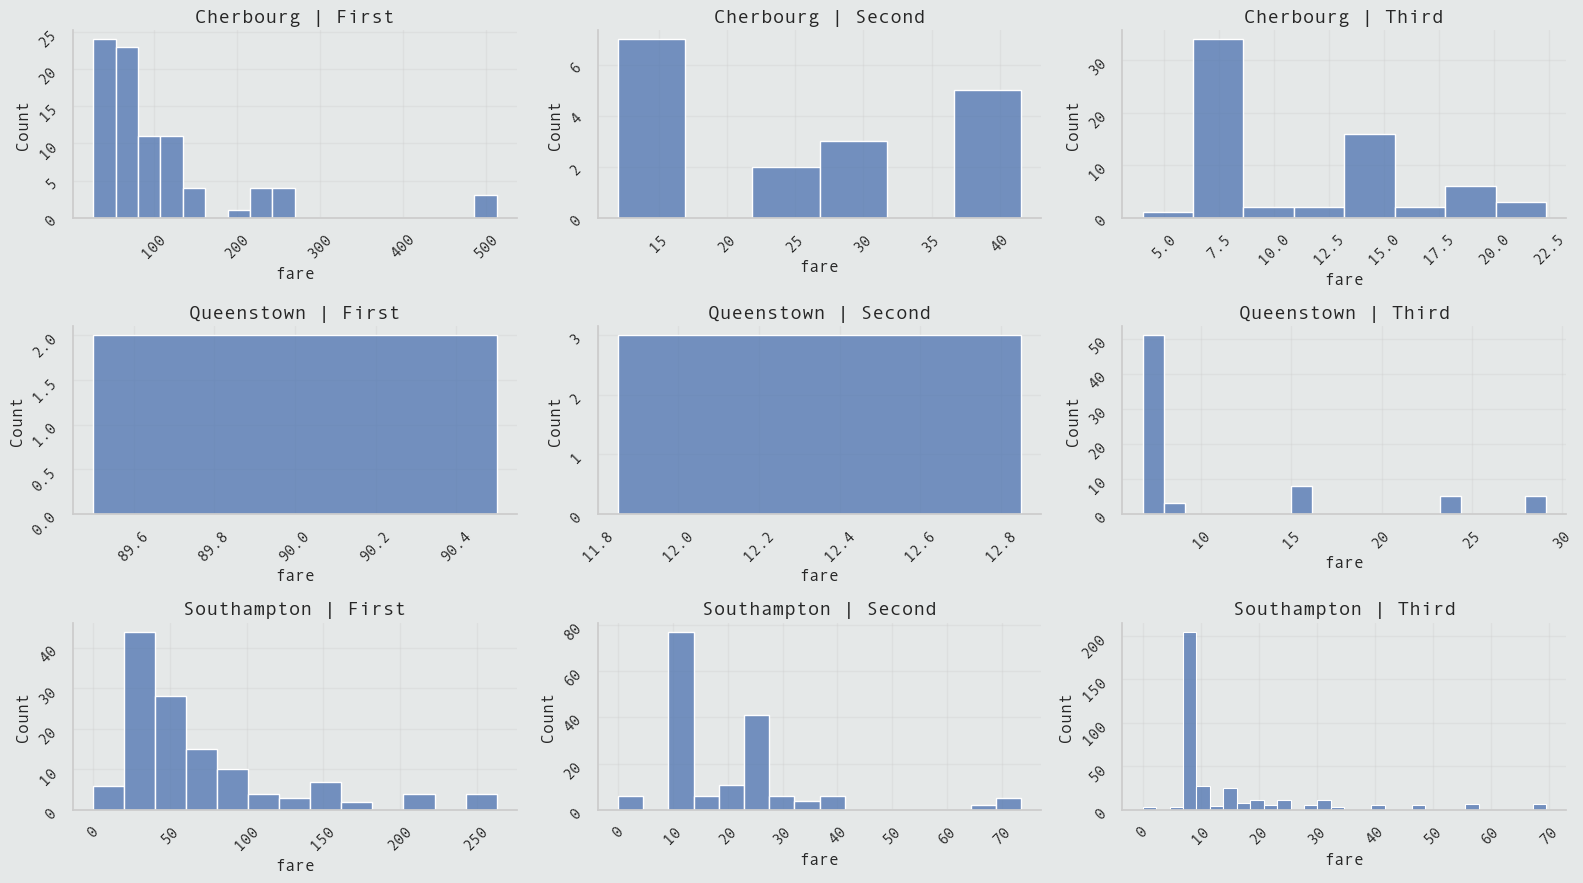

In [12]:
# Define the subplot
figure, ax = plt.subplots(3, 3, figsize=(16, 9))
ax = ax.flatten()

# Fetch the data to plot
for index, (combination, data_plot) in enumerate(data.groupby(['embark_town', 'class'])):
    
    # Plot data
    sns.histplot(data=data_plot.fare, 
                 ax=ax[index])
    
    ax[index].set_title(' | '.join(combination), fontsize=14)
    
    ax[index].tick_params(labelrotation=45)
    
plt.tight_layout()

## Lineplot

### Single

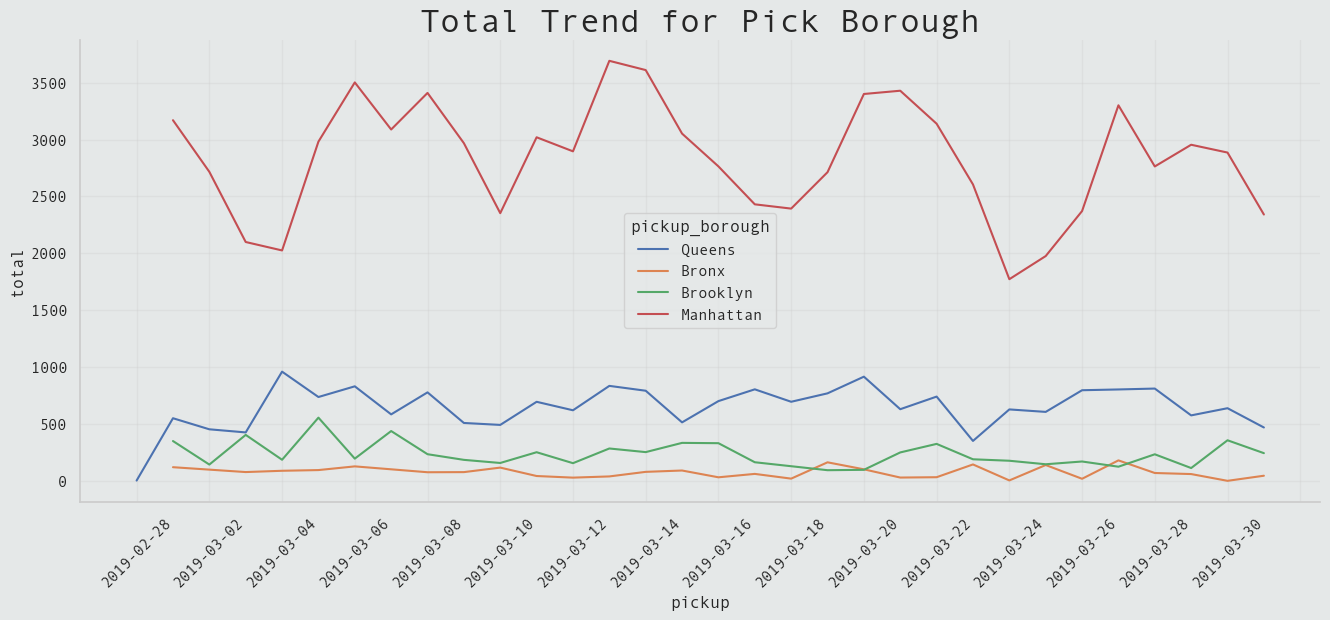

In [13]:
ax = sns.lineplot(
    data=time_data.groupby([
        time_data.pickup.dt.strftime('%Y-%m-%d'), time_data.pickup_borough 
    ])['total'].sum().reset_index(), 
    x='pickup', 
    y='total', 
    hue='pickup_borough'
)

ax.set_title('Total Trend for Pick Borough')

plt.xticks(rotation=45)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

plt.show()

### Multiple

In [14]:
# Subset the data
time_data_0_3_passengers = time_data[time_data['passengers'] < 4].reset_index()

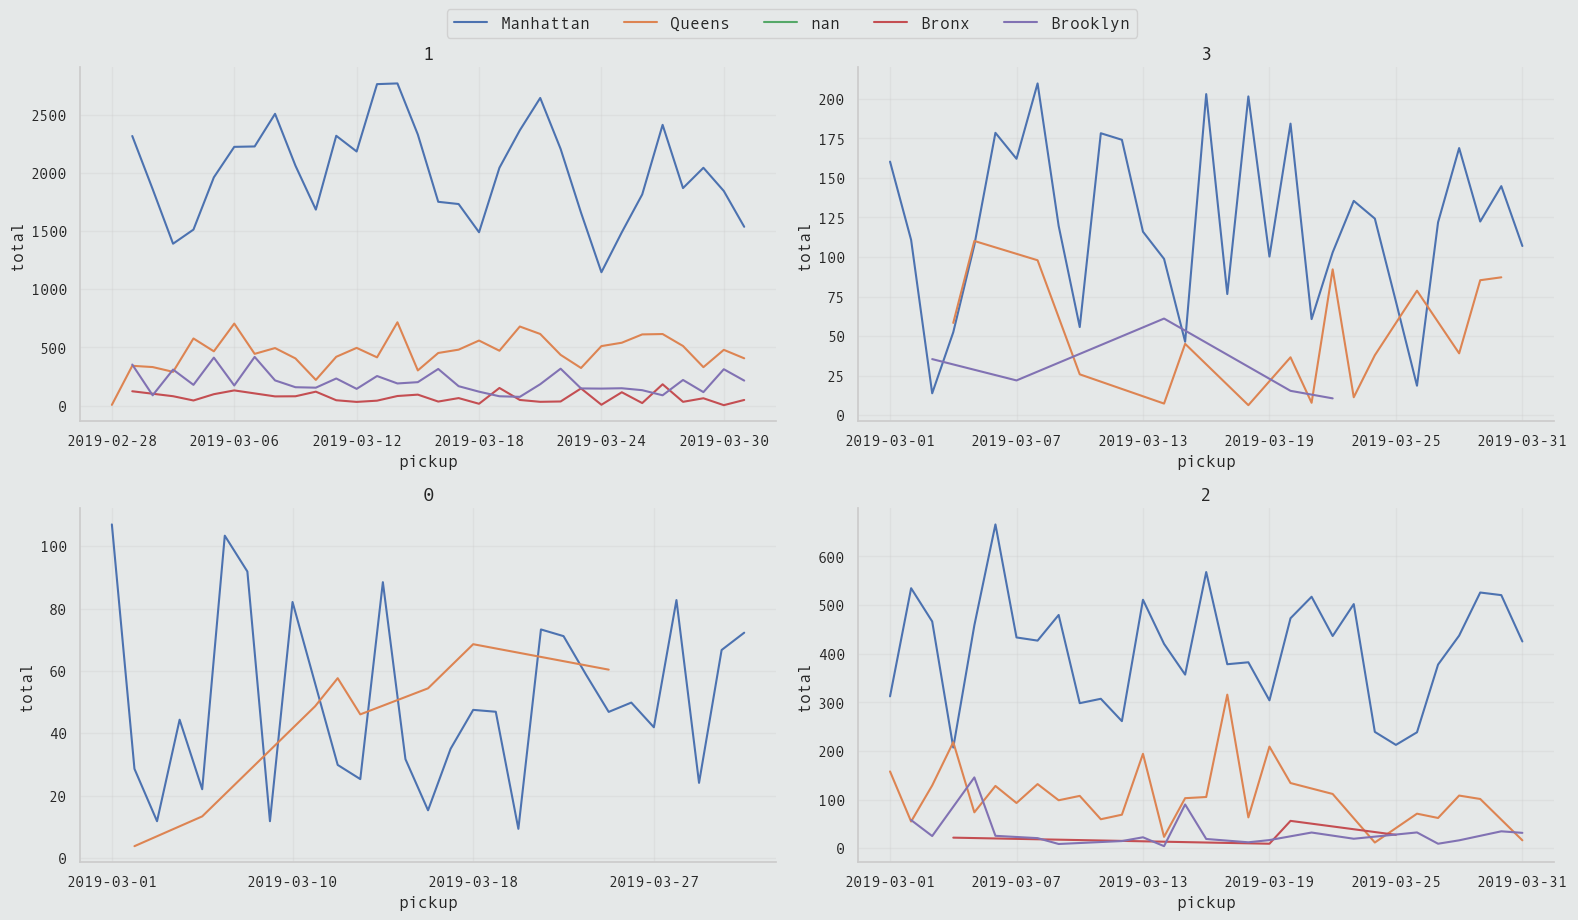

In [15]:
# Define the subplot
figure, ax = plt.subplots(2, 2, figsize=(16, 9))
ax = ax.flatten()
hue_order = time_data_0_3_passengers['pickup_borough'].unique()

# Fetch the data to plot
for index, passengers in enumerate(time_data_0_3_passengers['passengers'].unique()):
    
    # Retrieve the data to plot
    data_plot = time_data_0_3_passengers[time_data_0_3_passengers['passengers'] == passengers]
    
    # Define the plot
    sns.lineplot(data=data_plot.groupby([
                        data_plot.pickup.dt.strftime('%Y-%m-%d'), 
                        data_plot.pickup_borough
                        ])['total'].sum().reset_index(), 
                 x='pickup', 
                 y='total', 
                 hue='pickup_borough',
                 hue_order=hue_order,
                 ax=ax[index])
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()
    
    # Set the title
    ax[index].set_title(passengers, fontsize=14)
    ax[index].xaxis.set_major_locator(ticker.MaxNLocator(nbins=data_plot.pickup.dt.strftime('%Y-%m-%d').nunique()/5))
    
# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=time_data['pickup_borough'].nunique() + 1)
    
plt.tight_layout()

## Scatterplot

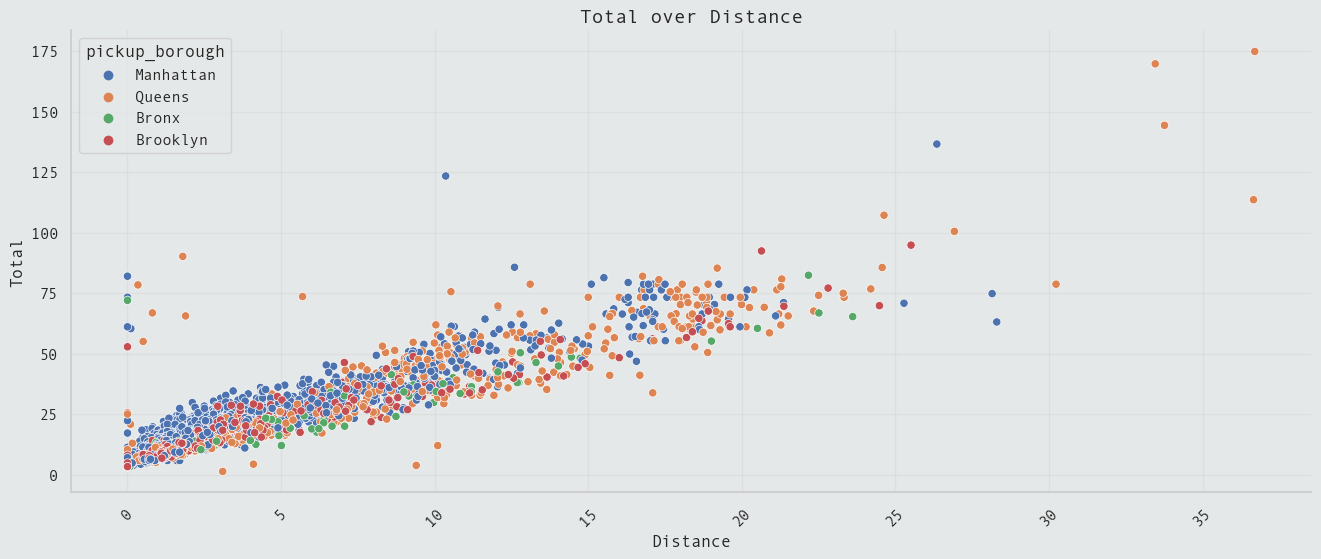

In [16]:
# Plot Scatterplot of 'total' over 'distance' per 'pickup_borough'
ax = sns.scatterplot(data=time_data,
                     x='distance',
                     y='total', 
                     hue='pickup_borough')

ax.set_ylabel('Total', 
              fontweight='bold')

ax.set_xlabel('Distance', 
              fontweight='bold')

ax.set_title('Total over Distance', 
             fontsize=14)

plt.xticks(rotation=45)

plt.show()

# Utils

## Null Values Percentage

[Reference Notebook](https://www.kaggle.com/code/jcaliz/tps-sep22-eda-baseline-you-were-looking-for)

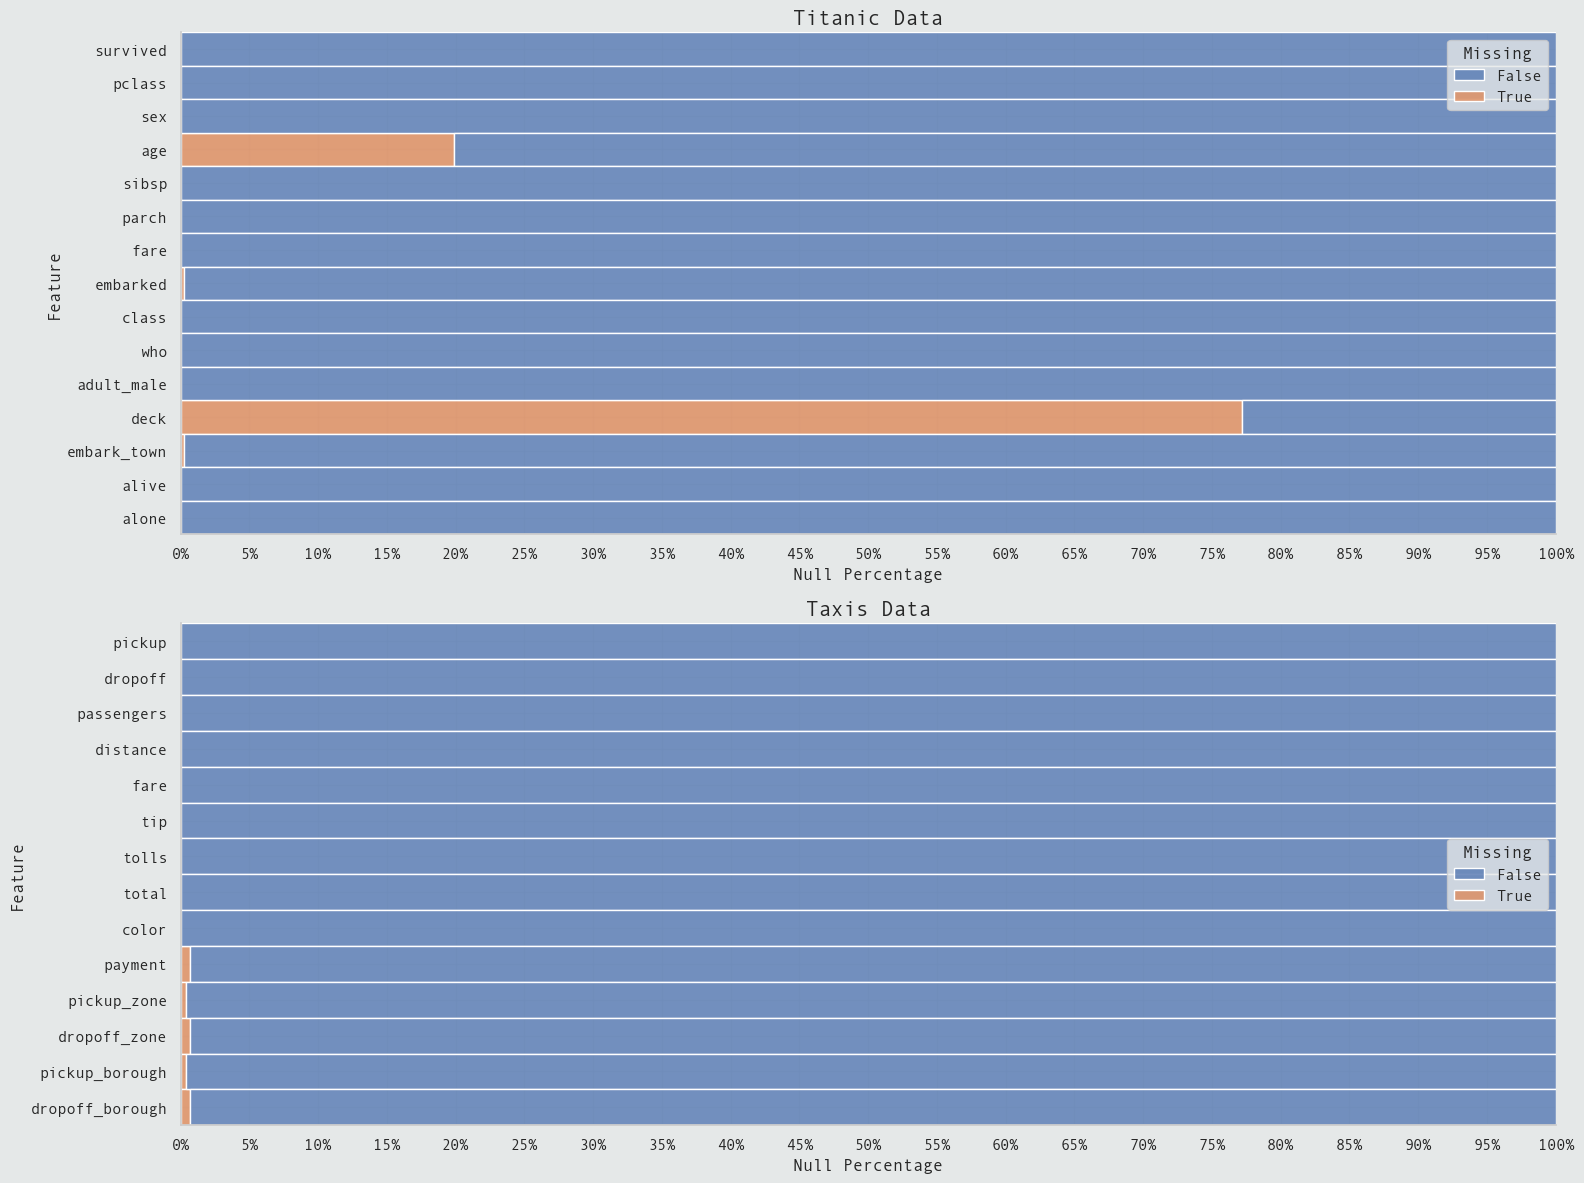

In [17]:
# Define data to display
data_to_display = {
    'Titanic Data': data,
    'Taxis Data': time_data
}

# Create figure
figure = plt.figure(tight_layout=True, figsize=(16, 12))

# Define figure's subplots
grid_spec = GridSpec(len(data_to_display), 1)

# Fetch data to plot
for row, (name, dataframe) in enumerate(data_to_display.items()):
    
    # Create subplot
    ax = figure.add_subplot(grid_spec[row, 0])
    
    sns.histplot(data=dataframe.isna().melt(var_name='Feature', value_name='Missing'), 
                 y='Feature', 
                 hue='Missing', 
                 multiple='fill',
                 ax=ax)
    
    # Refactor x label as missing percentage
    ax.xaxis.set_major_locator(ticker.LinearLocator(21))
    ax.xaxis.set_major_formatter('{:.0%}'.format)
    
    # Set title and label
    ax.set_title(name, fontsize=15)
    ax.set_xlabel('Null Percentage')

## Seasonality

In [25]:
def plot_seasonality(seasonality_column, ci=95, alpha=1):
    """
    Utility function for plot the specified seasonality in 'seasonality_column' with respect to the 'product' and 'store' grouping
    
    Parameters:
        seasonality_column:
        ci: Integer confidence interval value
        alpha
    """
    
    # Define the subplots
    figure, ax = plt.subplots(4, 2, figsize=(18, 20))
    ax = ax.flatten()
    hue_order = books_sold_train['country'].unique()
    
    
    # Compute every possible combination between 'product' and 'store'
    products = books_sold_train['product'].unique()
    stores = books_sold_train['store'].unique()
    iterator = cartesian_product(products, stores)
    
    # Fetch the data to plot
    for index, (product, store) in enumerate(iterator):
        
        # Retrieve the data to plot
        data_plot = books_sold_train[
            (books_sold_train['store'] == store) &
            (books_sold_train['product'] == product)]
    
        # Plot the data
        sns.lineplot(
            data=pd.melt(
                data_plot, 
                id_vars=['country', seasonality_column],
                value_vars=['num_sold'],
                value_name='num_solds'
            ),
            x=seasonality_column,
            y='num_solds',
            hue='country',
            ax=ax[index],
            errorbar=('ci', ci),
            alpha=alpha,
            hue_order=hue_order
        )
        
        # Set Title
        ax[index].set_title(f'{store} | {product}', 
                             fontsize=12)
        
        # Retrieve legend information
        handles = ax[index].get_legend_handles_labels()[0]
        labels = ax[index].get_legend_handles_labels()[1]
        ax[index].legend().remove()

    # Set the legend
    figure.legend(handles, 
                  labels, 
                  loc='upper center', 
                  bbox_to_anchor=(0.5, 1.03), 
                  fontsize=12,
                  ncol=books_sold_train['country'].nunique())
    
    # Set the figure title
    plt.suptitle(f'Seasonality by {seasonality_column}',
                 fontsize=16)
    
    plt.tight_layout()
    
    plt.show()

In [19]:
def engineer_date(data: pd.DataFrame):
    """
    Engineer the 'date' column to retrieve meaningful information such as the day, month, year, day of week, quarter, day of year and week of year
    
    Parameters:
        data: Pandas DataFrame with the 'date' column
    
    Return:
        data: Pandas DataFrame with the engineered date columns
    """
    
    # Day
    data['day'] = data['date'].dt.day
    
    # Month
    data['month'] = data['date'].dt.month
    
    # Year
    data['year'] = data['date'].dt.year
    
    # Day of the week
    data['dayofweek'] = data['date'].dt.dayofweek
    
    # Quarter
    data['quarter'] = data['date'].dt.quarter
    
    # Day of the year
    data['dayofyear'] = data['date'].dt.dayofyear
    
    # Week of the year
    data['weekofyear'] = data['date'].dt.isocalendar().week
    data.loc[data['weekofyear'] > 52, 'weekofyear'] = 52 # Not every year has 53 weeks, so let's cap to 52
    data['weekofyear'] = data['weekofyear'].astype('int64') # Convert back the column to integer

In [21]:
# apply the 'engineer_date' function over dataset
engineer_date(books_sold_train)

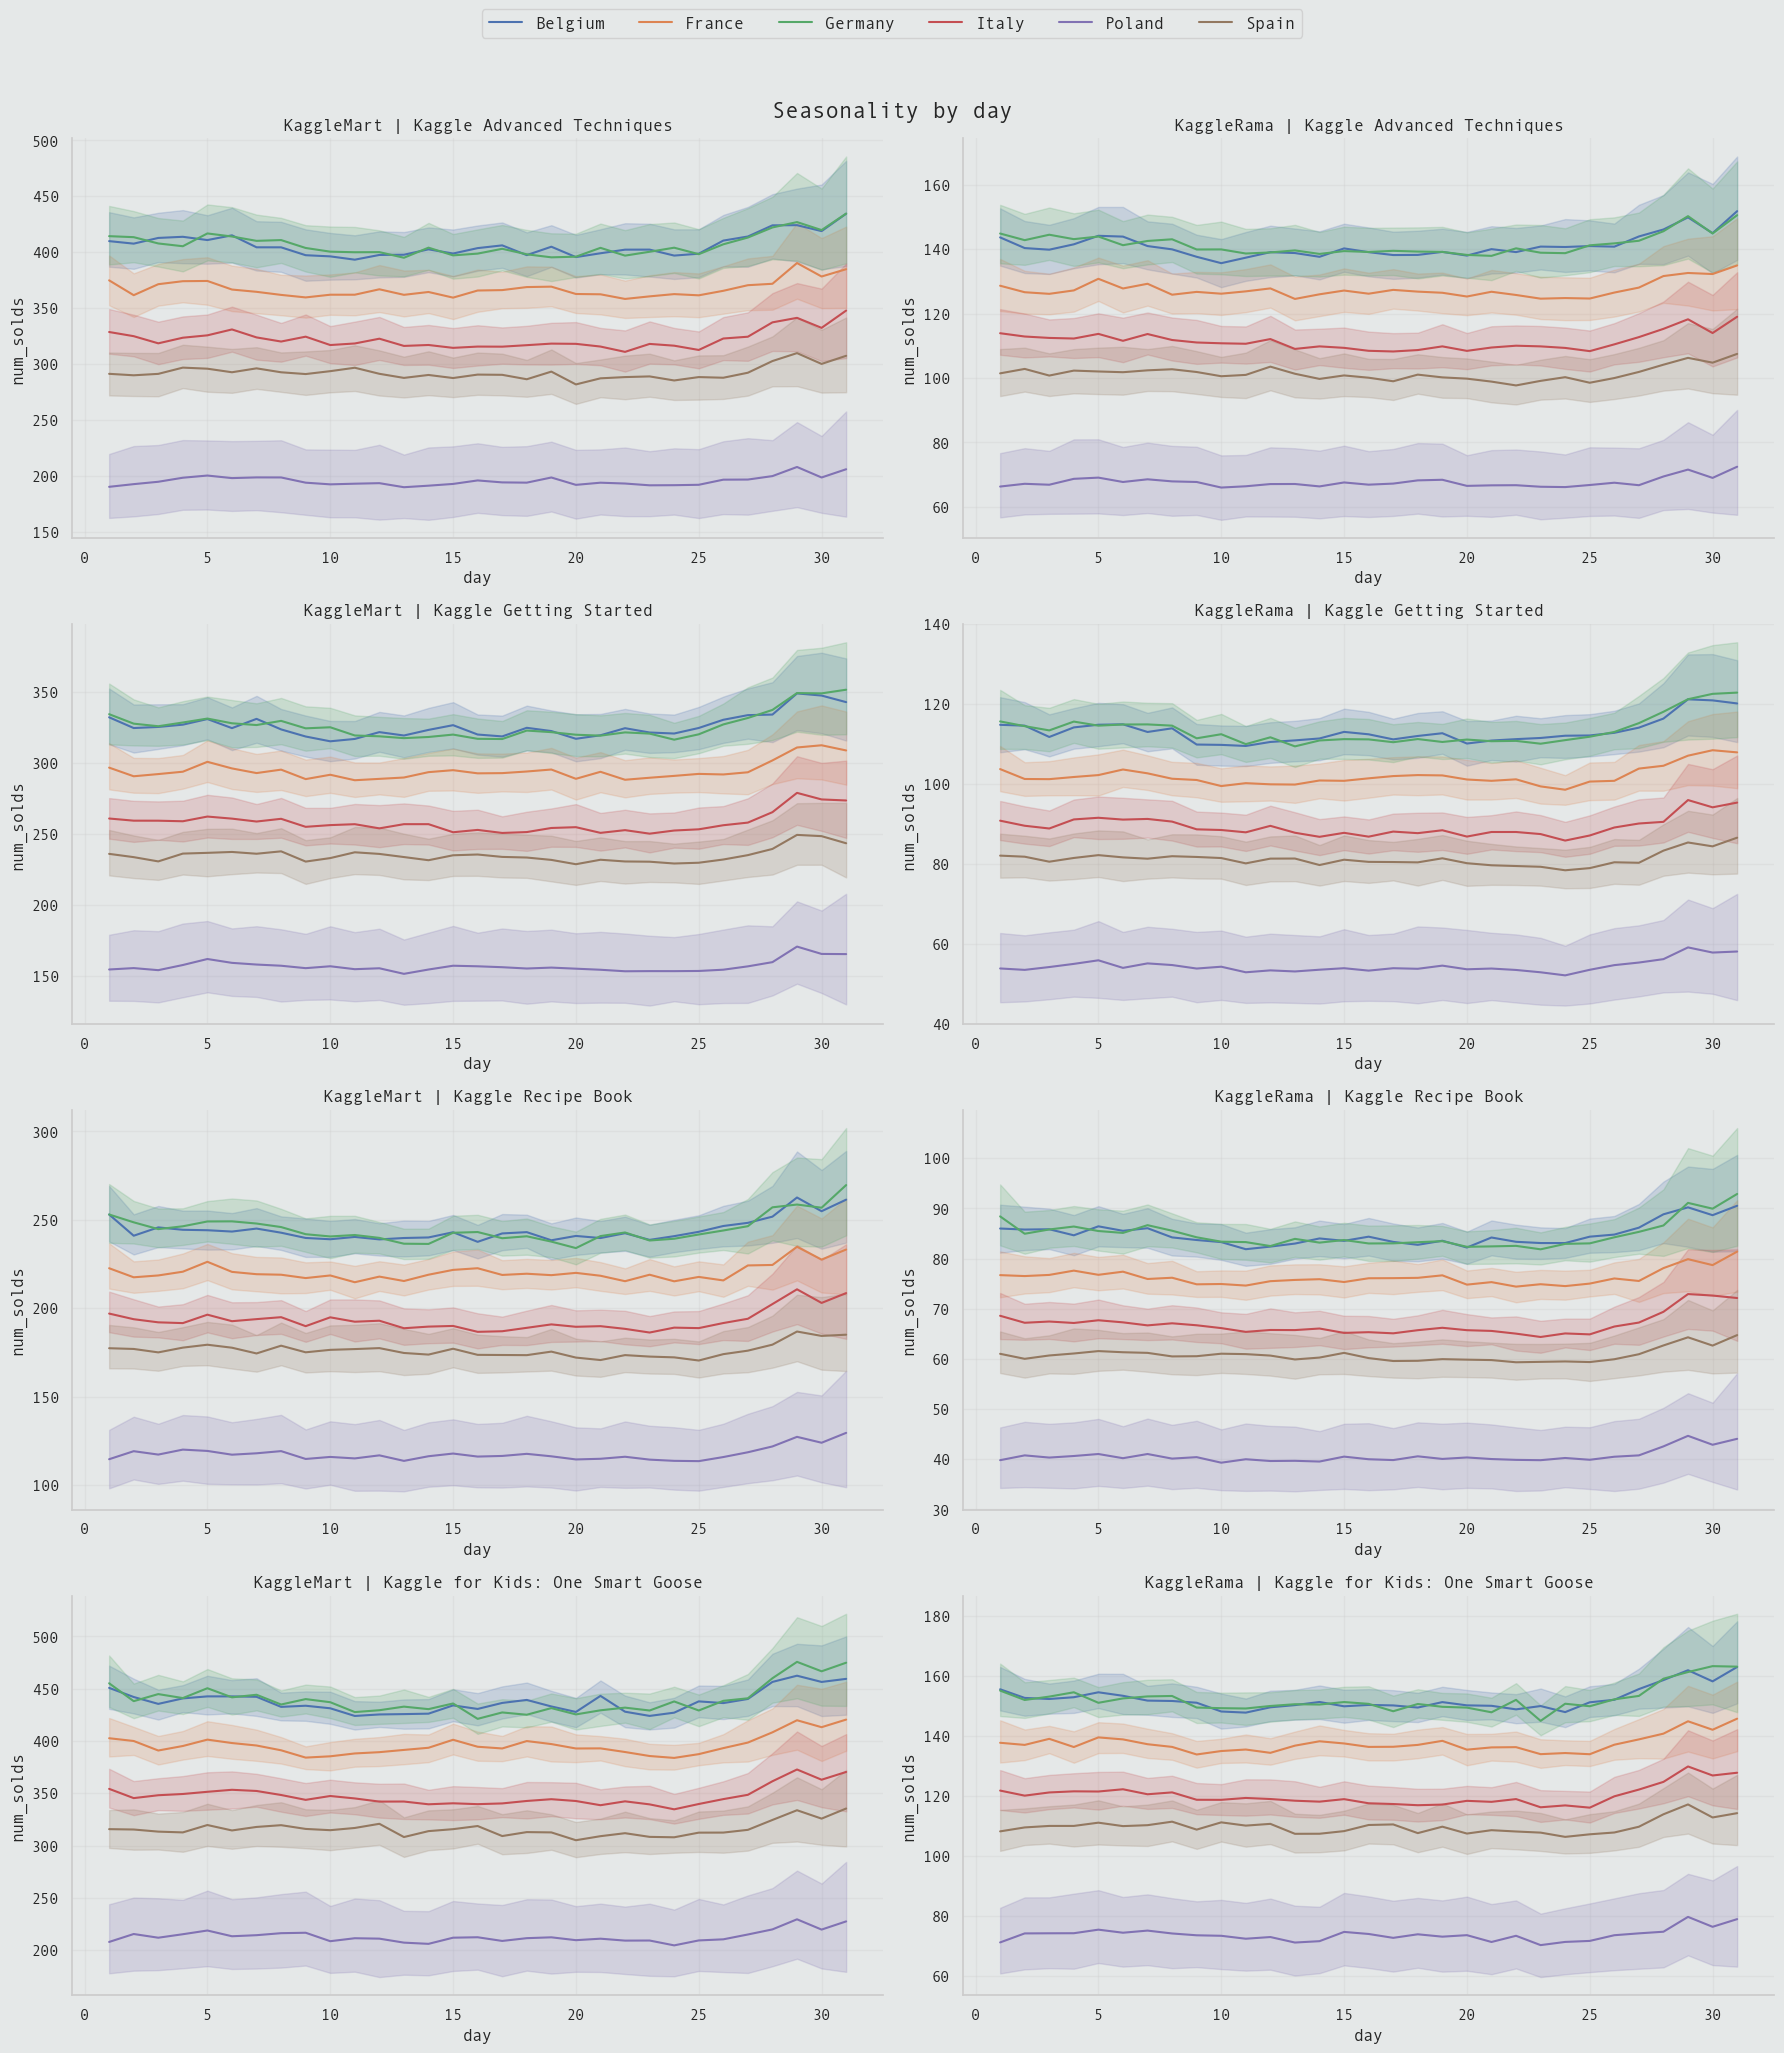

In [26]:
plot_seasonality('day')

## Date Range in Train & Test Data

Train Data Time Range
min   2017-01-01
max   2020-12-31
Name: date, dtype: datetime64[ns]


Test Data Time Range
min   2021-01-01
max   2021-12-31
Name: date, dtype: datetime64[ns]




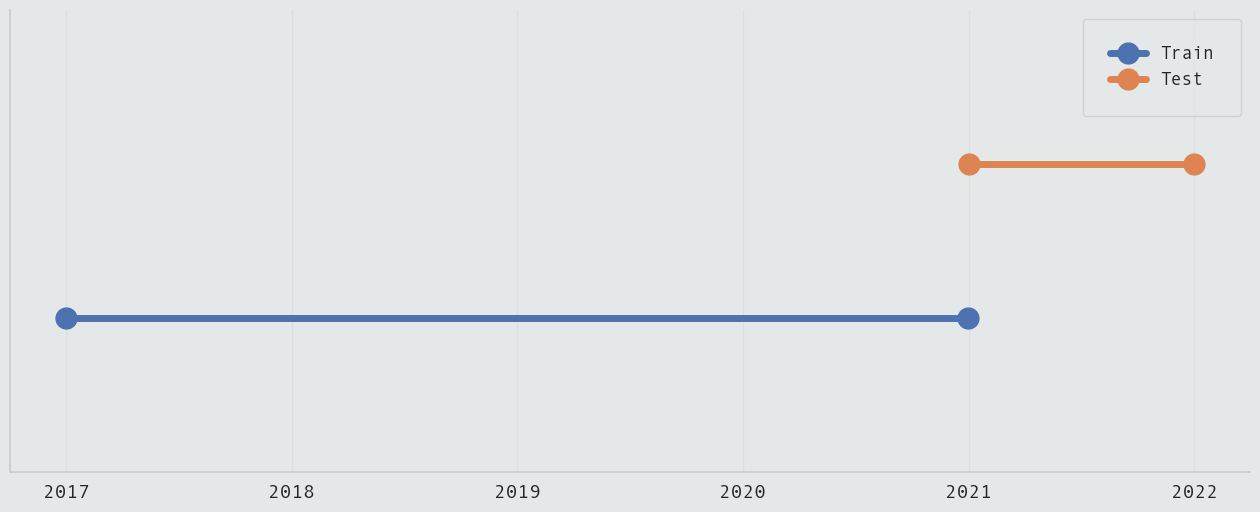

In [27]:
# Compute the min and max time range for train & test data
train_range = books_sold_train.date.agg(['min', 'max'])
test_range = books_sold_test.date.agg(['min', 'max'])

# Define the subplot
figure, ax = plt.subplots()

# Plot the train_range time range
ax.plot(train_range, 
        [0.2, 0.2], 
        linewidth=5, 
        marker='.', 
        markersize=30, 
        label='Train')

# Plot test_rage time rage
ax.plot(test_range, 
        [0.3, 0.3], 
        linewidth=5, 
        marker='.', 
        markersize=30, 
        label='Test')

# Refine plot height
ax.set_ylim(0.1, 0.4)
ax.legend()

# Remove the y-ticks since it's not need
ax.set_yticks(ticks=[]);

plt.xticks(fontsize=14)
ax.legend(borderpad=1.5, fontsize=13)

print('Train Data Time Range', train_range, '\n', sep='\n')
print('Test Data Time Range', test_range, sep='\n')
print('\n')